In [ ]:
# colab 한글깨짐 해결위한 설치
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline

# # mac OS 한글 깨짐 해결
# rc('font', family = 'AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# colab 한글이 깨짐 해결
from matplotlib import font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

# 런타임 다시 시작해야 한글 깨짐 해결가능!!!!

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# LinearSVM (선형 서포트 벡터 머신)

## 1) 가상 데이터로 실습하기

### 1.1 가상 데이터 생성

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 1000, n_features = 2, n_redundant = 0, n_informative = 1,
                           n_classes = 2, n_clusters_per_class = 1, random_state = 42)

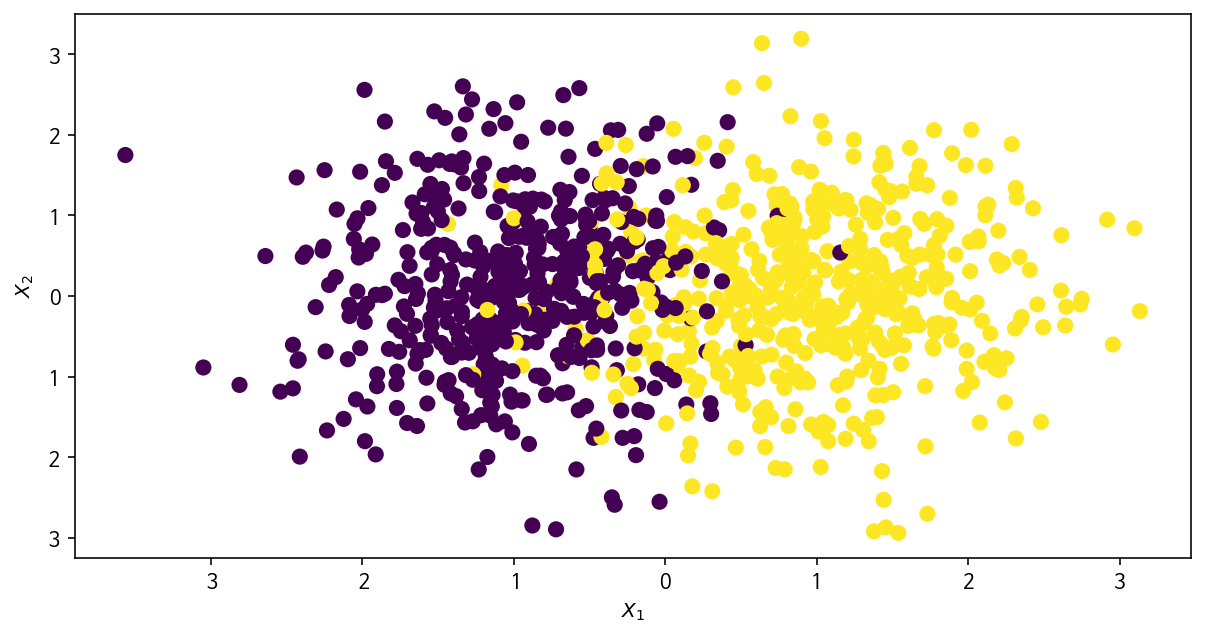

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 50)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [ ]:
# 6:4의 비율로 train 데이터, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = True, random_state = 30)

### 1.2 모델링 및 평가

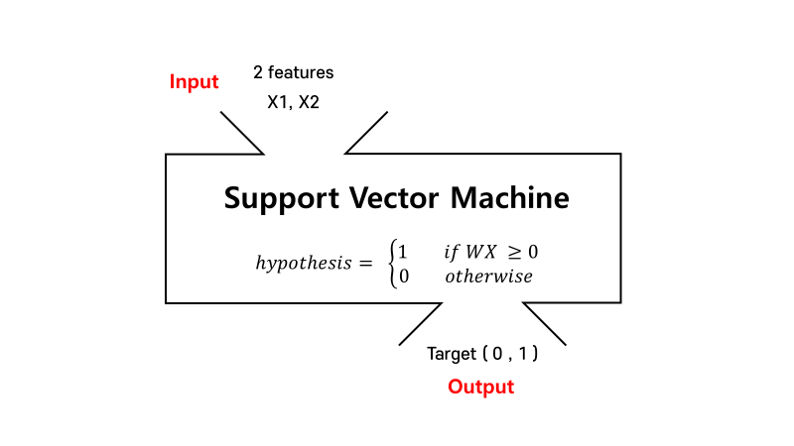

SVC  

* 주요 parameter:
 - `kernel` : 커널 타입['rbf', 'linear', 'poly', 'sigmoid', 'precomputed'], 기본값은 'rbf'  
        커널(kernel)은 선형으로 분리할 수 없는 점들을 분류하기 위해 사용한다.  
        커널을 통해 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환할 수 있다.  
        
        RBF(Radial Bias Function):
        rbf커널 혹은 가우시안 커널이라고 불리며 무한차원까지 모든 다항식을 고려한다. 여러 커널 중 가장 성능이 좋아 자주 사용된다.  
<a title="Shehzadex, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"><img width="512" alt="Kernel yontemi ile veriyi daha fazla dimensiyonlu uzaya tasima islemi" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png/512px-Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png"></a>  
커널을 통해 데이터를 더 높은 차원으로 변형함으로 나타냄으로써 결정 경계를 얻을 수 있다.  
[출처] <a href="https://commons.wikimedia.org/wiki/File:Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png">Shehzadex</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

 - `C` : 슬랙 변수 가중치(slack variable weight), 기본값은 1.0  
        C는 얼마나 많은 데이터 샘플들이 다른 클래스로 예측되는지를 허용하는지를 정해준다. 즉, 모델의 오차 허용률을 조절한다.  
        C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.  
        C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.     
        즉, 높은 C값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 C값은 모델을 더 유연하게 만들어준다.  
 - `gamma` : 학습 데이터에 얼마나 민감하게 반응할 것인지 결정, 기본값은 'scale'(= 1/(n_features*X.var())) 
        즉, 결정경계의 굴곡의 정도를 결정한다. 
        gamma값이 클수록 경계선에서 가까운 점들만이 계산에서 고려되어 결정경계의 굴곡이 높아진다.
        gamma값이 작을수록 경계선에서 멀리 떨어진 점들까지도 계산에서 고려되어 결정경계의 굴곡이 낮아진다.
        따라서, 높은 gamma값은 모델을 더 안정적으로 만들어주는 반면에, 낮은 gamma값은 모델을 더 유연하게 만들어준다.  
        
    ![c_gamma](https://tensorflowkorea.files.wordpress.com/2017/06/2-42.png?w=768)  
    C값이 클수록, gamma값이 클수록 결정경계를 더욱 안정적으로 만드는 것을 알 수 있다.  
    [출처] [tensorflow.blog](https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-7-%ec%bb%a4%eb%84%90-%ec%84%9c%ed%8f%ac%ed%8a%b8-%eb%b2%a1%ed%84%b0-%eb%a8%b8%ec%8b%a0/#svm-understand)  




참고 : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

In [ ]:
# 서포트벡터머신을 생성한 뒤 학습데이터로 학습시켜보자
from sklearn.svm import SVC

linear_svc = SVC(kernel = 'linear', C = 1, random_state = 0)
linear_svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

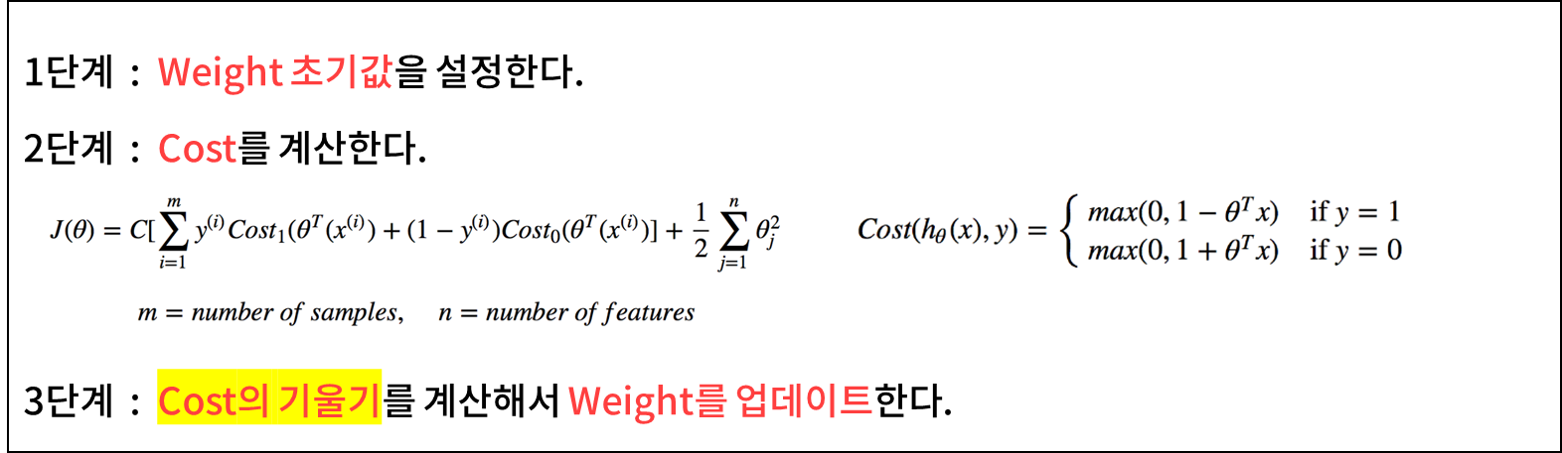

In [ ]:
# 각 클래스의 서포트의 개수, support vector의 개수
linear_svc.n_support_

array([69, 68], dtype=int32)

In [ ]:
# 각 클래스의 서포트 벡터값
linear_svc.support_vectors_

array([[-0.02671158, -0.08071658],
       [-0.4334009 ,  0.55148538],
       [ 0.06903235, -0.15005559],
       [ 0.06034994, -1.04691098],
       [-0.29353102,  1.61371127],
       [-0.45319479,  0.16057398],
       [ 0.53085776, -0.6097829 ],
       [ 0.2417964 ,  0.30982071],
       [-0.34726256,  1.2130977 ],
       [ 0.07251223,  0.4137991 ],
       [-0.427216  ,  0.1845513 ],
       [-0.08218445,  1.60734558],
       [ 0.17248312,  1.38009135],
       [-0.44986261,  0.18335992],
       [-0.44868944, -0.66809045],
       [-0.36453232, -0.37283315],
       [-0.47271195, -1.76076276],
       [-0.38355895,  0.55832691],
       [-0.05872915,  0.99801011],
       [-0.28999522, -1.42181067],
       [-0.3749472 ,  0.58636402],
       [ 0.37492102,  0.18102156],
       [-0.18809644,  1.57398676],
       [-0.18143235,  0.70117274],
       [ 0.00742617, -0.96834445],
       [ 0.74222175,  0.99626682],
       [-0.38855086, -0.24415664],
       [-0.34125884,  0.30263547],
       [-0.28326218,

No handles with labels found to put in legend.


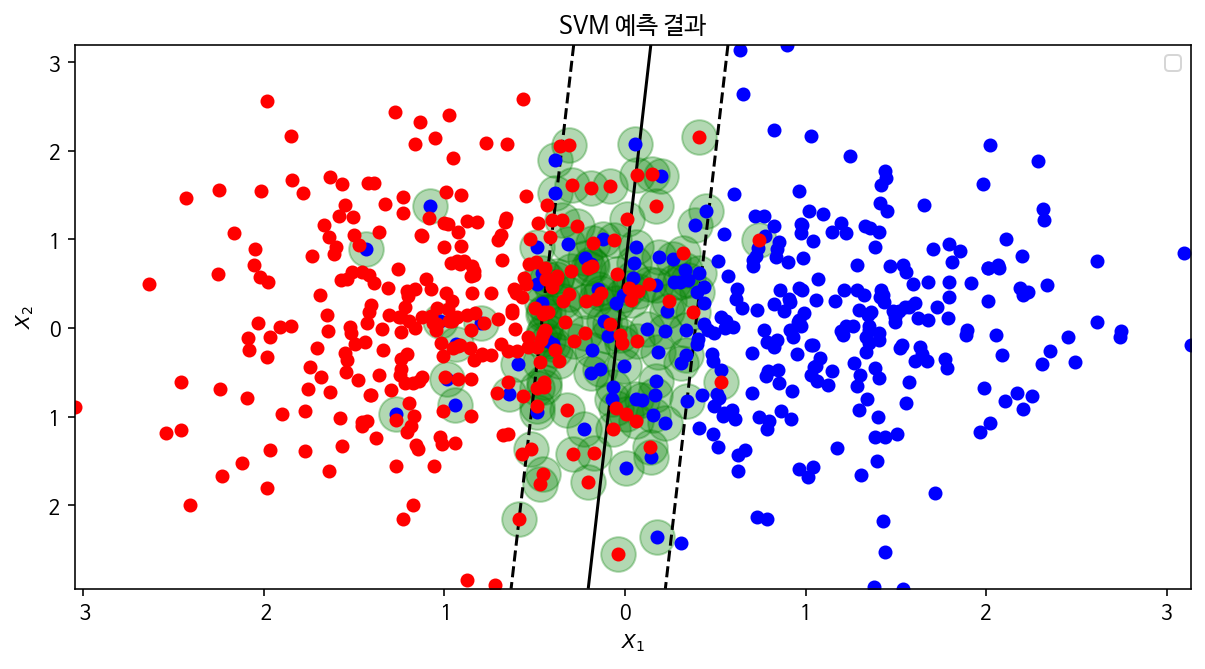

In [ ]:
xmin = X_train[:, 0].min()
xmax = X_train[:, 0].max()
ymin = X_train[:, 1].min()
ymax = X_train[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = linear_svc.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]

plt.figure(figsize = (10, 5))
plt.plot(X_train[:, 0][y_train == 1], X_train[:,1][y_train == 1], 'bo')
plt.plot(X_train[:, 0][y_train == 0], X_train[:,1][y_train == 0], 'ro')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(linear_svc.support_vectors_[:, 0], 
            linear_svc.support_vectors_[:, 1], s=300, c = 'g', alpha=0.3) # alpha는 투명도

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = linear_svc.predict(X_test)

print('train score : {:.3f}'.format(linear_svc.score(X_train, y_train)))
print('test score : {:.3f}\n'.format(linear_svc.score(X_test, y_test)))

print('오차행렬:\n', confusion_matrix(y_test, pred))
print('분류 report:\n', classification_report(y_test, pred))

train score : 0.910
test score : 0.920

오차행렬:
 [[188   9]
 [ 23 180]]
분류 report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       197
           1       0.95      0.89      0.92       203

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



### 1.3 C 값 조정

이번에는 모델의 오차 허용률을 조정하기 위해 C값을 변화시켜보자.

In [ ]:
# 비교를 위해 C값을 0.1로 설정했다.
# C값이 작을수록 오류를 더 많이 허용하며 이를 소프트 마진(soft margin)이라고 부른다.

linear_svc01 = SVC(kernel = 'linear', C = 0.1, random_state = 0).fit(X_train, y_train)

In [ ]:
linear_svc01.n_support_

array([85, 85], dtype=int32)

No handles with labels found to put in legend.


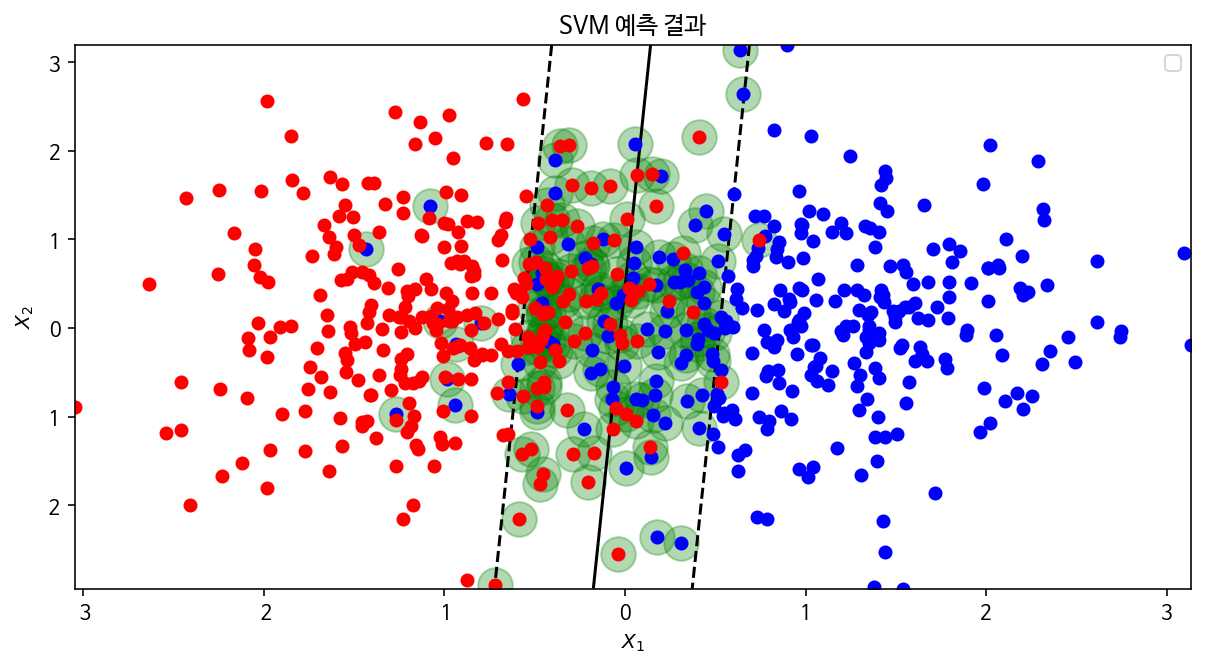

In [ ]:
xmin = X_train[:, 0].min()
xmax = X_train[:, 0].max()
ymin = X_train[:, 1].min()
ymax = X_train[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = linear_svc01.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
plt.figure(figsize = (10, 5))
plt.plot(X_train[:, 0][y_train == 1], X_train[:,1][y_train == 1], 'bo')
plt.plot(X_train[:, 0][y_train == 0], X_train[:,1][y_train == 0], 'ro')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(linear_svc01.support_vectors_[:, 0], 
            linear_svc01.support_vectors_[:, 1], s=300, c = 'g', alpha=0.3) # alpha는 투명도

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

C값이 작아지면서 더 많은 데이터가 서포트 벡터로 사용되고 마진은 더 커진것을 알 수 있다.

In [ ]:
pred_01 = linear_svc01.predict(X_test)

print('train score : {:.3f}'.format(linear_svc01.score(X_train, y_train)))
print('test score : {:.3f}\n'.format(linear_svc01.score(X_test, y_test)))

print('오차행렬:\n', confusion_matrix(y_test, pred_01))
print('분류 report:\n', classification_report(y_test, pred_01))

train score : 0.905
test score : 0.920

오차행렬:
 [[188   9]
 [ 23 180]]
분류 report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       197
           1       0.95      0.89      0.92       203

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



C값을 낮추니(학습과정에서 오차를 많이 허용) train 데이터의 정확도가 소폭 하락했다.  
즉, C값을 지나치게 낮게 설정하면 underfitting의 문제가 발생할 수도 있다.

In [ ]:
# 이번에는 C값을 100으로 설정해보자.
# C값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라고 부른다.

linear_svc10 = SVC(kernel = 'linear', C = 10, random_state = 0).fit(X_train, y_train)

In [ ]:
linear_svc10.n_support_

array([66, 66], dtype=int32)

No handles with labels found to put in legend.


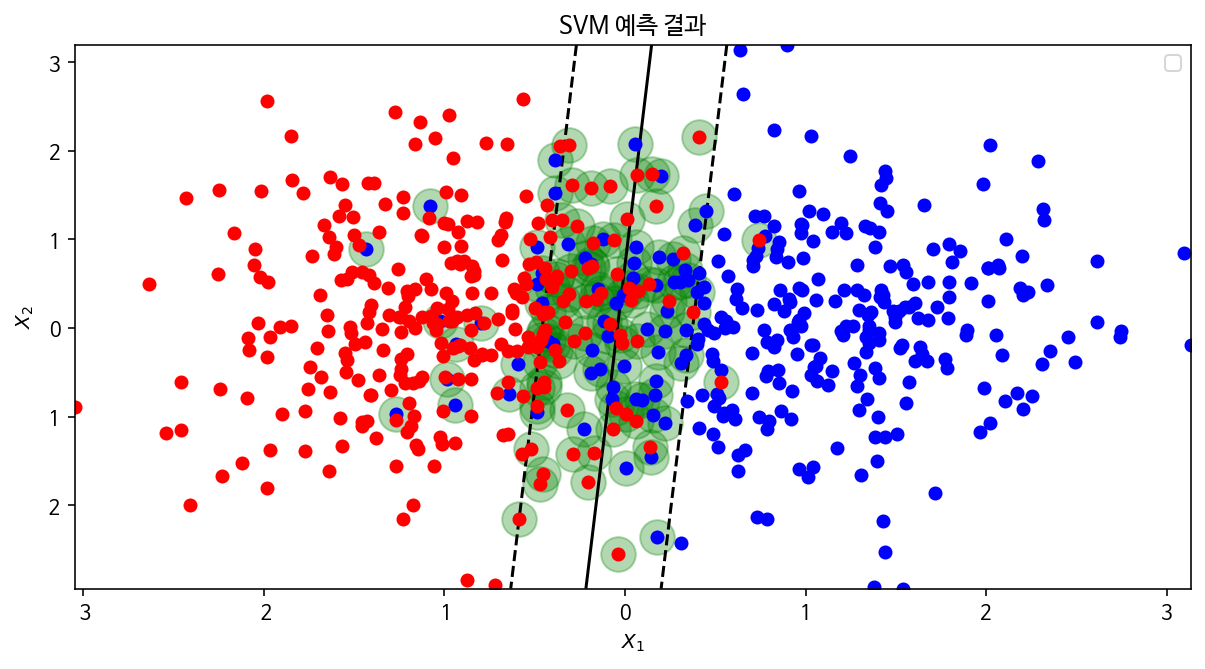

In [ ]:
xmin = X_train[:, 0].min()
xmax = X_train[:, 0].max()
ymin = X_train[:, 1].min()
ymax = X_train[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = linear_svc10.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
plt.figure(figsize = (10, 5))
plt.plot(X_train[:, 0][y_train == 1], X_train[:,1][y_train == 1], 'bo')
plt.plot(X_train[:, 0][y_train == 0], X_train[:,1][y_train == 0], 'ro')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(linear_svc10.support_vectors_[:, 0], 
            linear_svc10.support_vectors_[:, 1], s=300, c = 'g', alpha=0.3) # alpha는 투명도

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

C값이 커지면서 서포트 벡터의 수는 줄어들고 마진 역시 더 작아진 것을 알 수 있다.

In [ ]:
pred_10 = linear_svc10.predict(X_test)

print('train score : {:.3f}'.format(linear_svc10.score(X_train, y_train)))
print('test score : {:.3f}\n'.format(linear_svc10.score(X_test, y_test)))

print('오차행렬:\n', confusion_matrix(y_test, pred_10))
print('분류 report:\n', classification_report(y_test, pred_10))

train score : 0.910
test score : 0.917

오차행렬:
 [[187  10]
 [ 23 180]]
분류 report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       197
           1       0.95      0.89      0.92       203

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



C값을 높이니(학습과정에서 오차를 적게 허용) test 데이터의 정확도가 소폭 하락했다.  
즉, C값을 지나치게 높게 설정하면 overfitting의 문제가 발생할 수도 있다.

### 1.4 스케일링 전, 후 비교

다른 선형모델과 마찬가지로 SVM은 데이터의 scale에도 영향을 받는다.

In [ ]:
# make_blobs를 이용하여 새로운 가상의 데이터를 생성해보자.
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X,y = make_blobs(n_samples = 1000, centers= 2, random_state = 33) # 33

In [ ]:
# 모든 행의 첫번째 열
X[:, 0]

array([-5.62886836, -6.74721157, -4.65018825, -6.22600379, -3.68475487,
       -6.00873484, -6.04620045, -3.6784848 , -4.41854562, -4.83307455,
       -4.51590569, -5.85428319, -1.71228536, -5.98689172, -4.93817642,
       -2.23958154, -2.48868997, -2.41524366, -2.10478767, -0.75818077,
       -1.31004468, -3.3502071 , -4.71689258, -1.40946013, -0.64353619,
       -1.93150847, -0.26552163, -0.91944703, -6.0476108 , -5.63768121,
       -4.60946182, -3.28625548, -1.5590719 , -4.29611432, -3.19776944,
       -2.43093277, -0.52442578, -2.21915932, -6.24119998, -2.3418531 ,
       -5.30313761, -0.29915833, -1.03709123, -5.17924739, -1.49818494,
       -1.58997194, -5.98101646, -1.90240006, -2.39205918, -2.65431532,
       -4.41286235, -1.62479281, -1.98234739, -2.25268213, -0.19285991,
       -4.93957677, -3.93171381, -4.22720994, -6.26340652, -0.37749513,
       -3.24805641, -2.00603922, -2.01285715, -1.44795377, -1.47951706,
       -1.66559876, -5.25465199, -4.71463998, -0.13102143, -6.43

In [ ]:
# 첫번재 열의 제곱합과 두번째 열의 제곱합을 비교해보면 서로 크게 차이가 나지 않는 것을 확인할 수 있다.
np.sum(np.square(X[:, 0])), np.sum(np.square(X[:, 1])) 

(15056.203396035766, 12981.617074352827)

In [ ]:
# 이번에는 임의로 첫번째 열의 원소에만 100을 곱해 첫번째 열과 두번째 열의 scale을 다르게 해보자.
X[:, 0] = X[:, 0]*100

In [ ]:
# 첫 번째 열에 100을 곱한 뒤에는 두 열의 scale이 다른 것을 확인할 수 있다.
np.sum(np.square(X[:, 0])), np.sum(np.square(X[:, 1])) 

(150562033.96035767, 12981.617074352827)

In [ ]:
# scale이 달라진 첫번째 열을 포함한 데이터로 SVC 모델 학습을 시켜보자
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle = True)

pre_scale = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

In [ ]:
pre_scale.n_support_

array([7, 6], dtype=int32)

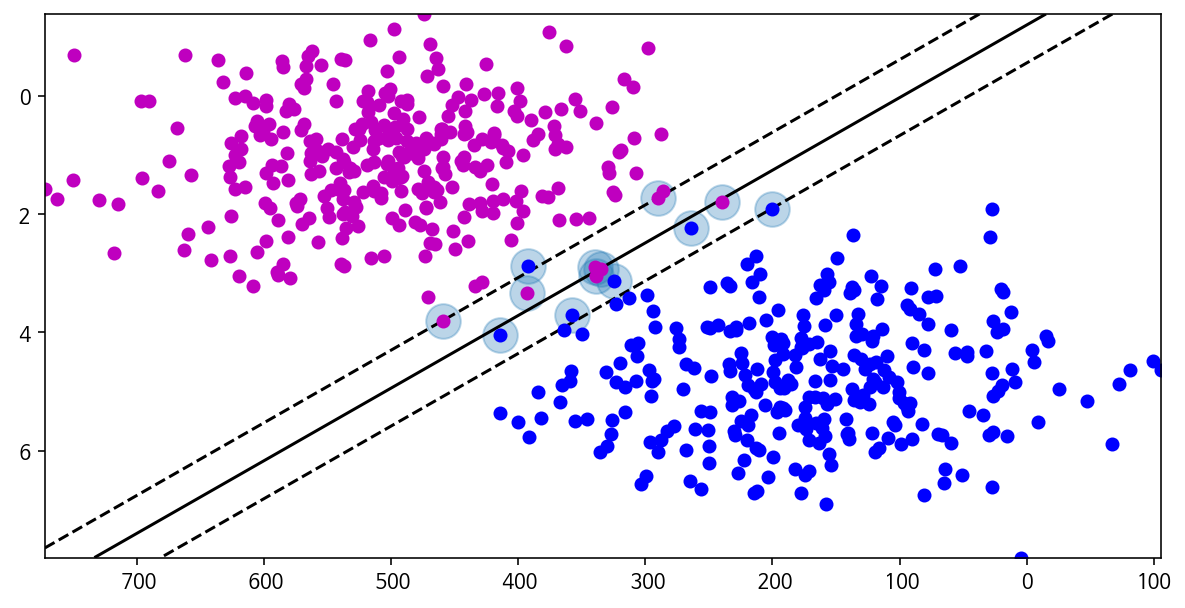

In [ ]:
xmin = X_train[:, 0].min()
xmax = X_train[:, 0].max()
ymin = X_train[:, 1].min()
ymax = X_train[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = pre_scale.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
plt.figure(figsize = (10, 5))
plt.plot(X_train[:, 0][y_train == 1], X_train[:,1][y_train == 1], 'bo')
plt.plot(X_train[:, 0][y_train == 0], X_train[:,1][y_train == 0], 'mo')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(pre_scale.support_vectors_[:, 0], 
            pre_scale.support_vectors_[:, 1], s=300, alpha=0.3)

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred_pre = pre_scale.predict(X_test)

print('train score : {:.3f}'.format(pre_scale.score(X_train, y_train)))
print('test score : {:.3f}\n'.format(pre_scale.score(X_test, y_test)))

print('오차행렬:\n', confusion_matrix(y_test, pred_pre))
print('분류 report:\n', classification_report(y_test, pred_pre))

train score : 0.993
test score : 0.993

오차행렬:
 [[181   1]
 [  2 216]]
분류 report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       182
           1       1.00      0.99      0.99       218

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
# 이번에는 StandardScaler를 활용하여 두 feature 간의 scale을 맞춰보자
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# StandardScaler 적용 전에는 여전히 scale이 다르다.
np.sum(np.square(X_train[:, 0])), np.sum(np.square(X_train[:, 1]))

(93772889.32290298, 7352.638735998771)

In [ ]:
# StandardScaler 적용 후에는 두 열 간의 scale이 비슷해진 것을 확인할 수 있다.
X_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test) # train 데이터에 대해 scaler를 적용할 경우 test데이터에 대해서도 transform으로 적용해줘야한다.

np.sum(np.square(X_scale[:, 0])), np.sum(np.square(X_scale[:, 1]))

(600.0, 600.0000000000001)

In [ ]:
# 이번에는 scale을 동일하게 맞춘 데이터에 대해 SVC 모델을 학습시켜보자.
fit_scale = SVC(kernel = 'linear', C = 1).fit(X_scale, y_train)

In [ ]:
fit_scale.n_support_

array([11, 11], dtype=int32)

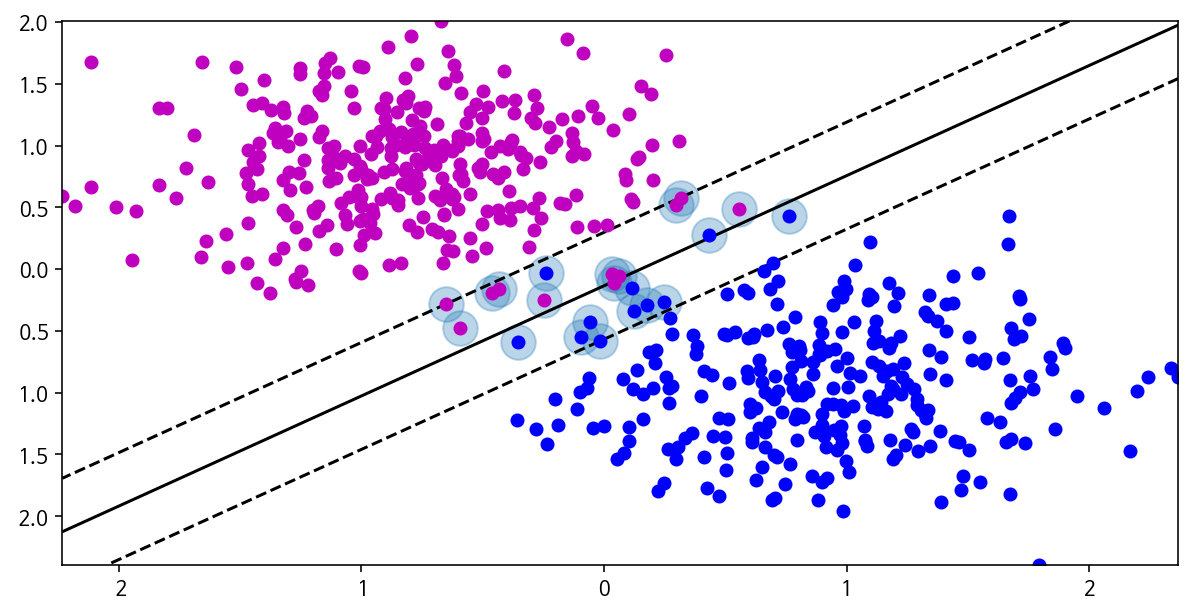

In [ ]:
xmin = X_scale[:, 0].min()
xmax = X_scale[:, 0].max()
ymin = X_scale[:, 1].min()
ymax = X_scale[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = fit_scale.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]

plt.figure(figsize = (10, 5))
plt.plot(X_scale[:, 0][y_train == 1], X_scale[:,1][y_train == 1], 'bo')
plt.plot(X_scale[:, 0][y_train == 0], X_scale[:,1][y_train == 0], 'mo')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(fit_scale.support_vectors_[:, 0], 
            fit_scale.support_vectors_[:, 1], s=300, alpha=0.3)

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred_scale = fit_scale.predict(X_test_scale)

print('train score : {:.3f}'.format(fit_scale.score(X_scale, y_train)))
print('test score : {:.3f}\n'.format(fit_scale.score(X_test_scale, y_test)))

print('오차행렬:\n', confusion_matrix(y_test, pred_scale))
print('분류 report:\n', classification_report(y_test, pred_scale))

train score : 0.995
test score : 0.993

오차행렬:
 [[181   1]
 [  2 216]]
분류 report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       182
           1       1.00      0.99      0.99       218

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



## 2) 붓꽃 품종 데이터로 실습하기

### 2.1 데이터 로드 및 확인

붓꽃(iris) 꽃잎, 꽃받침의 너비와 길이를 측정한 데이터이며 150개의 샘플로 구성되어 있으며 3개의 레이블 클래스를 가진다.

feature  
* `sepal length` : 꽃받침의 길이
* `sepal width` : 꽃받침의 너비
* `petal length` : 꽃잎의 길이
* `petal width` : 꽃잎의 너비


<a title="No machine-readable author provided. Dlanglois assumed (based on copyright claims)., CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg"><img width="512" alt="Iris versicolor 3" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/512px-Iris_versicolor_3.jpg"></a>  

<a href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg">No machine-readable author provided. Dlanglois assumed (based on copyright claims).</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

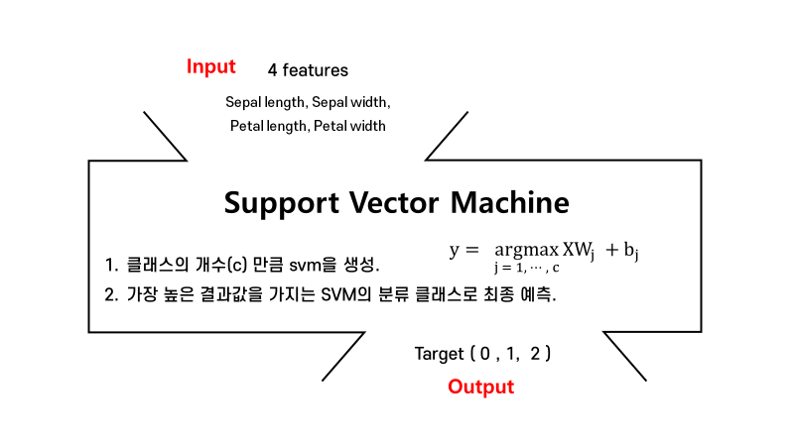

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data_iris = load_iris()

In [ ]:
# iris 데이터의 4가지 특성
data_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# iris의 데이터의 target
data_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 데이터프레임으로 확인해보자
import pandas as pd

x_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
y_iris = pd.DataFrame(data_iris.target, columns=['target'])

df_iris = pd.concat([x_iris, y_iris], axis=1)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


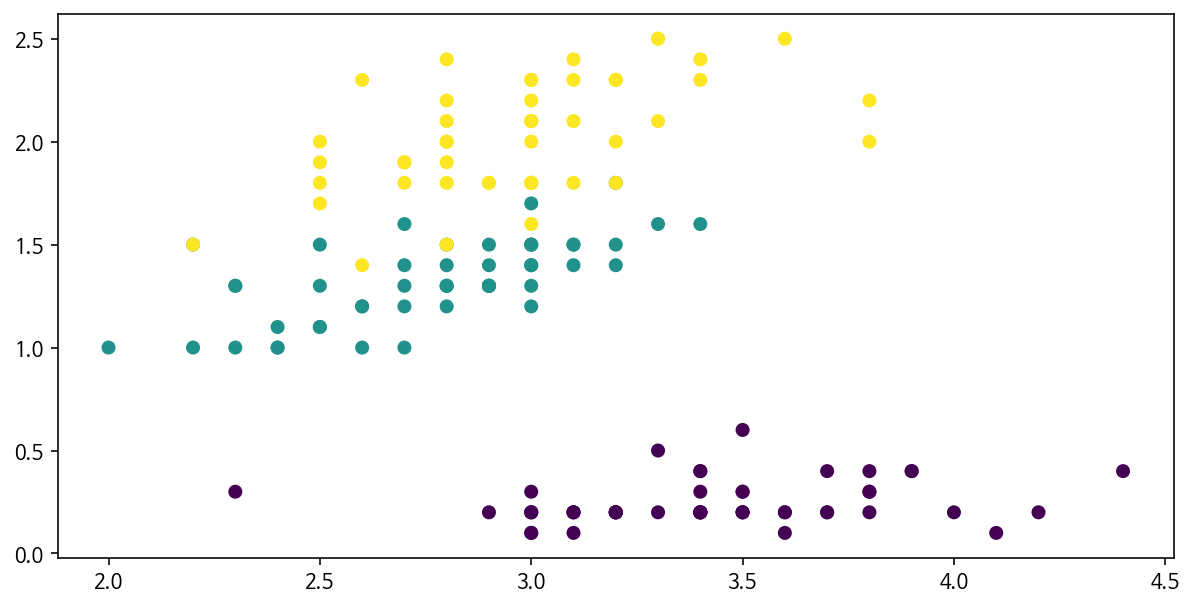

In [ ]:
# sepal width와 petal width에 따른 iris 종류를 그래프로 확인해보자.
plt.figure(figsize = (10, 5))
plt.scatter(x_iris.iloc[:, 1], x_iris.iloc[:, 3], c = data_iris.target)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_iris, y_iris, stratify = data_iris.target, test_size = 0.25, random_state = 0)

### 2.2 모델링 및 평가

In [ ]:
# 모델 생성 후 학습데이터로 학습
iris_linear = SVC(kernel = 'linear', C = 1, random_state = 0)
iris_linear.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

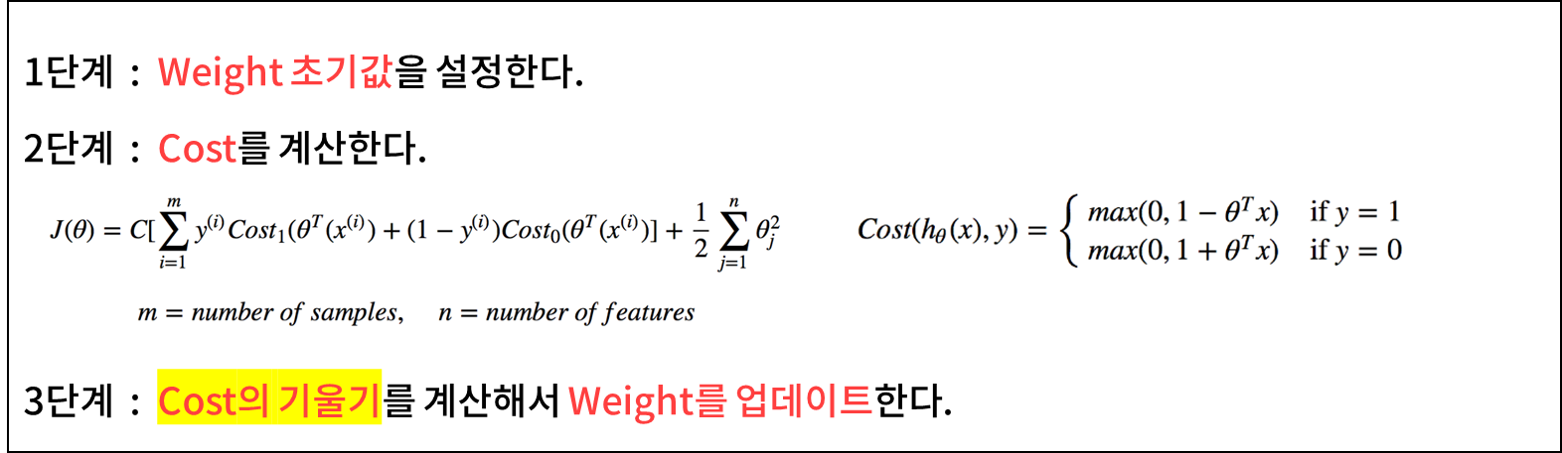

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = iris_linear.predict(X_test)

print('train score : {:.3f}'.format(iris_linear.score(X_train, y_train)))
print('test score : {:.3f}\n'.format(iris_linear.score(X_test, y_test)))

print('오차행렬:\n', confusion_matrix(y_test, pred))
print('분류 report:\n', classification_report(y_test, pred))

train score : 0.991
test score : 1.000

오차행렬:
 [[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]
분류 report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



하이퍼파라미터 튜닝 없이도 매우 좋은 분류성능을 보인다.

In [ ]:
# SVC는 확률수치를 알 수 있는 predict_proba()가 제공되지는 않지만 decision_function()이 제공된다.
iris_linear.decision_function(X_test)

array([[ 2.23700624,  1.29557443, -0.30380442],
       [ 2.23671008,  1.29486538, -0.30334395],
       [ 2.24174135,  1.29674962, -0.3049666 ],
       [ 2.21709987,  1.29245153, -0.30007111],
       [-0.22644099,  2.27230104,  0.76637193],
       [-0.2552498 ,  2.26135232,  0.91141944],
       [-0.24288382,  2.26651455,  0.81138531],
       [ 2.23408853,  1.29499007, -0.30317315],
       [-0.25258549,  2.26213272,  0.88123177],
       [-0.28186789,  1.25314468,  2.23293092],
       [-0.28654422,  1.17887599,  2.27746184],
       [-0.27135426,  1.22786483,  2.22973831],
       [-0.23910994,  2.2722462 ,  0.78086124],
       [-0.28023549,  1.2342979 ,  2.24812369],
       [-0.24368628,  2.26380887,  0.82721714],
       [ 2.23847749,  1.2949082 , -0.30354212],
       [ 2.23308839,  1.29334861, -0.30206879],
       [-0.27594301,  1.24105805,  2.22902978],
       [ 2.2422736 ,  1.29576305, -0.30443042],
       [-0.25486106,  2.26681419,  0.8557057 ],
       [-0.27183995,  1.24033328,  2.215

C값을 변경해보자

In [ ]:
# C값을 변경해 가면서 각 모델들의 score를 확인하고자 한다.
# 한 번에 확인하기 위해서 C값을 리스트로 저장하고 for문을 이용하여 score를 구했다.

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_score = []
test_score = []

for i in C:
    linear_svm = SVC(kernel = 'linear', C = i, random_state=0).fit(X_train, y_train)
    score_tr = linear_svm.score(X_train, y_train)
    score_te = linear_svm.score(X_test, y_test)
    train_score.append(score_tr)
    test_score.append(score_te)

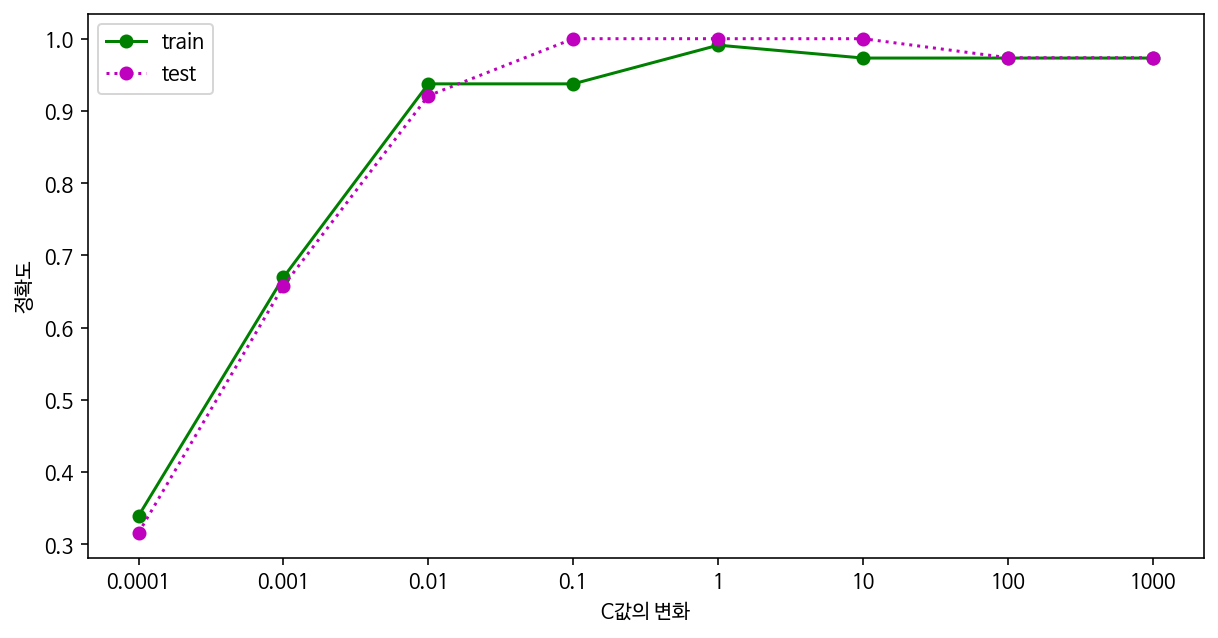

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C)), C)
plt.xlabel('C값의 변화')
plt.ylabel('정확도')
plt.legend(['train', 'test'])
plt.show()

C값이 지나치게 낮을 경우 train 데이터와 test 데이터 모두에 대해 낮은 성능을 보인다.  
즉, 학습과정에서 과도하게 오류를 허용할 경우 underfitting이 발생할 수 있다.

In [ ]:
# 시각화를 위해 mglearn 모듈 설치
pip install mglear치

     |████████████████████████████████| 542kB 8.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=1c7b9522ac66b81fc5978d948890852bffb1faf2601e1a87acddbdb1daa7e801
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
# 시각화를 위해서 2개의 특성만 사용해 분류모델을 만들어보자. (sepal width, pedal width)
data_x = data_iris.data[:, [1,3]]
data_y = data_iris.target

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.25, shuffle = True, random_state=0)
iris_linear2 = SVC(kernel = 'linear', C = 1, random_state = 0).fit(X_train, y_train)

print('test score : {}'.format(iris_linear2.score(X_test, y_test)))

test score : 0.9736842105263158


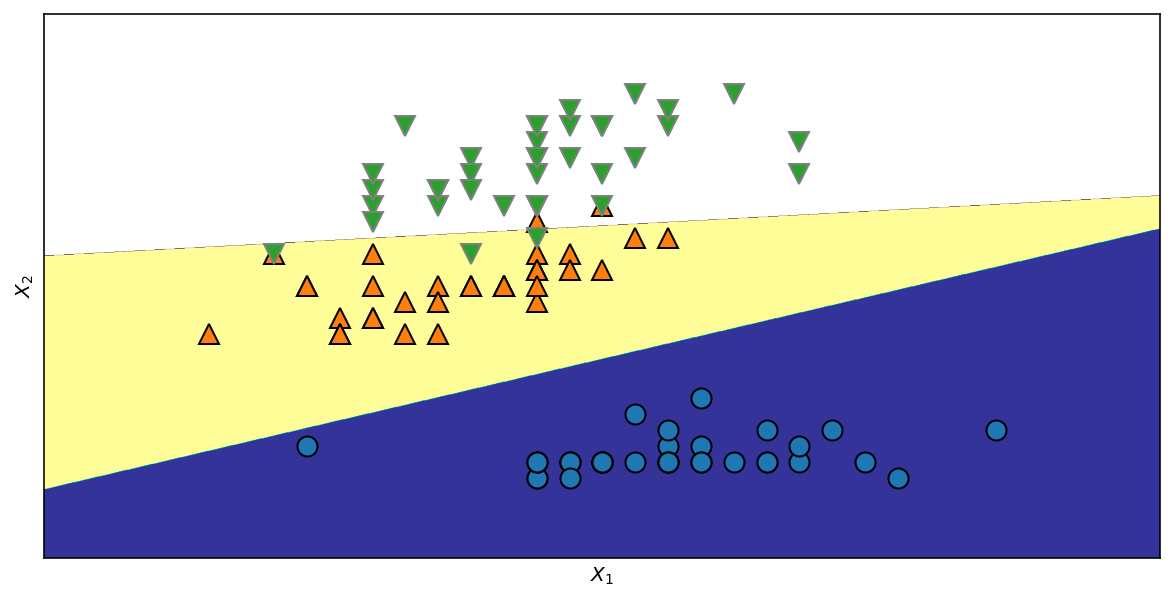

In [ ]:
import mglearn
# 시각화를 위해 mglearn모듈을 사용한다.

plt.figure(figsize=(10,5))
mglearn.plots.plot_2d_classification(iris_linear2, X_train, eps=0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

### 2.3 svm.LinearSVC()로 구현해보기

svm.SVC() 에서 `kernel`='linear'를 통해 선형SVM 모델을 생성할 수 있지만,  
svm.LinearSVC()를 통해서도 모델을 생성할 수 있다.


참고 : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC

LinearSVC()
  - kernel = 'linear'을 갖는 SVC()와 비슷하지만 libsvm이 아닌 liblinear의 관점에서 구현되어 규제와 loss함수 선택에 있어서 유연하며 데이터가 클 경우에 SVC()는 속도가 현저히 느려지기 때문에 LinearSVC()를 사용것을 권장한다.  
  - penalty 매개변수로 규제를 선택할 수 있으며, loss 매개변수로는 loss함수를 선택할 수 있다.  
  - pnealty의 기본값은 'l2'  
  - loss의 기본값은 'squared hinge', SVC(kernel = 'linear')와 같은 효과를 위해서는 'hinge'로 설정한다.  
  - 데이터의 스케일을 맞추지 않고 SVC 모델과 비교하게 되면 차이가 크게 난다. StandardScaler를 사용하면 데이터의 스케일을 자동으로 맞춰준다.

In [ ]:
# LinearSVC 도움말
from sklearn.svm import LinearSVC
LinearSVC?

In [ ]:
# SVC 대신 LinearSVC 를 사용하여 선형 서포트벡터머신 모델을 만들어보자.
linear_svc2 = LinearSVC(C = 1, loss = 'hinge', random_state = 0).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred_iris2 = linear_svc2.predict(X_test)

print('train score : {:.3f}'.format(linear_svc2.score(X_train, y_train)))
print('test score : {:.3f}\n'.format(linear_svc2.score(X_test, y_test)))

print('오차행렬:\n', confusion_matrix(y_test, pred_iris2))
print('분류 report:\n', classification_report(y_test, pred_iris2))

train score : 0.884
test score : 0.737

오차행렬:
 [[13  0  0]
 [ 0  6 10]
 [ 0  0  9]]
분류 report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.38      0.55        16
           2       0.47      1.00      0.64         9

    accuracy                           0.74        38
   macro avg       0.82      0.79      0.73        38
weighted avg       0.88      0.74      0.72        38



C값의 변화에 따른 성능 변화를 확인해보자

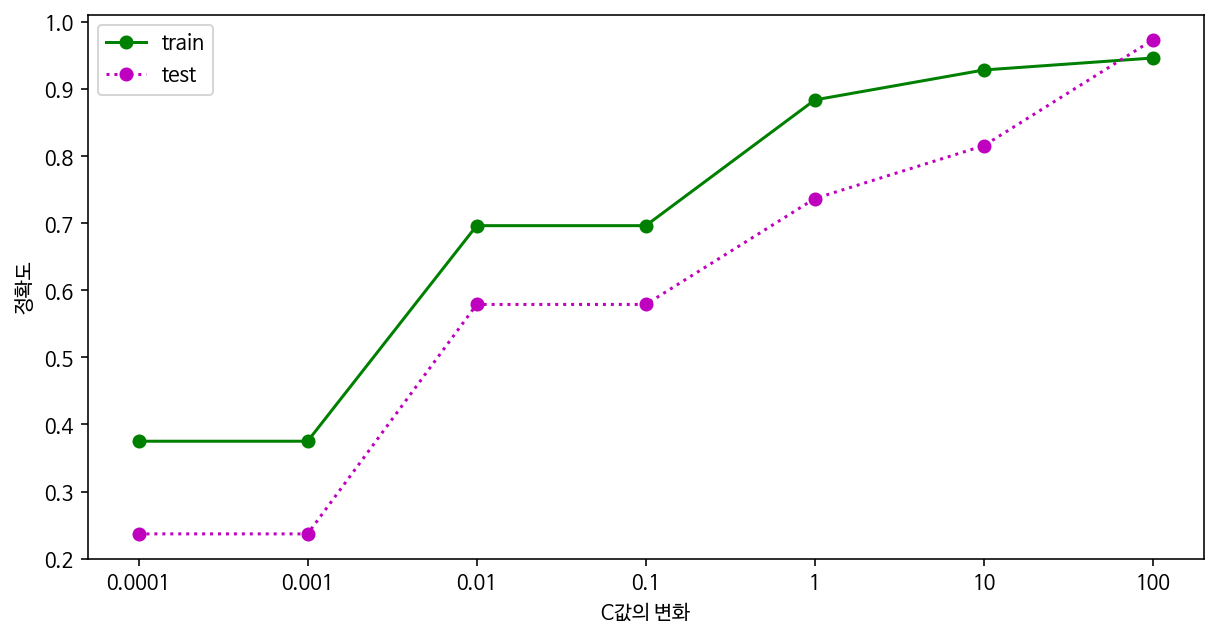

In [ ]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for i in C:
    # SVC -> LinearSVC
    linear_svm = LinearSVC(C = i, loss = 'hinge', random_state=42).fit(X_train, y_train)
    scoretr = linear_svm.score(X_train, y_train)
    scorete = linear_svm.score(X_test, y_test)
    train_score.append(scoretr)
    test_score.append(scorete)
    
plt.figure(figsize = (10, 5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C)), C)
plt.xlabel('C값의 변화')
plt.ylabel('정확도')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# 시각화를 위해서 2개의 특성만 사용해 분류모델을 만들어보자. (sepal width, pedal width)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

data_iris = load_iris()
X = data_iris.data[:, [1,3]]
y = data_iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = data_iris.target,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state=0)

In [ ]:
linear_svc3 = LinearSVC(C = 1, loss = 'hinge', random_state = 0).fit(X_train, y_train)

print('test score : {:.3f}'.format(linear_svc3.score(X_test, y_test)))

test score : 0.895


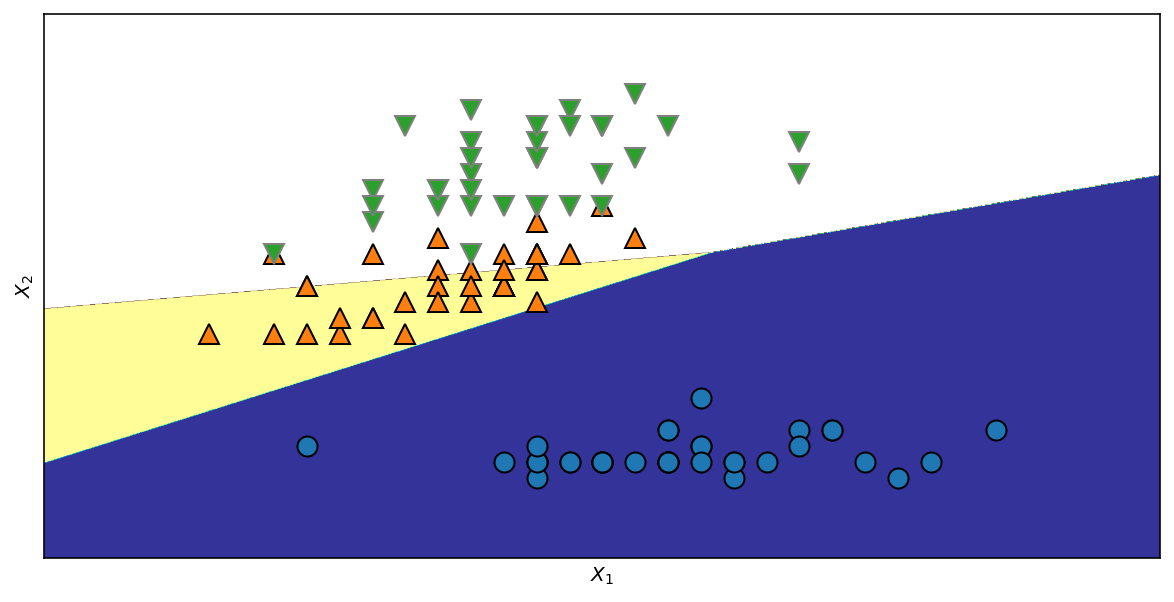

In [ ]:
import mglearn
# 시각화를 위해 mglearn모듈을 사용한다.

plt.figure(figsize=(10,5))
mglearn.plots.plot_2d_classification(linear_svc3, X_train, eps=0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

# (심화학습) Linear SVM pseudo code



```
class SVC(object):
    
    학습 과정
    def fit(X_data, y_data):
        1. y가 0 이하인 경우 -1, 아닌 경우 1로 변환
        2. weight, bias 초기화
        3. 경사하강법을 활용하여 반복 학습
            3-1. hinge loss 함수 조건 판단
            3-2. 분류 결과에 따라 weight 업데이트
                - 분류를 정확하게 한 경우
                        마진을 최대화 하는 방향으로 weight 업데이트
                - 분류를 정확하게 하지 못한 경우
                        마진을 최대화, 오차를 최소화 하는 방향으로 weight 업데이트


    예측 과정
    def predict(X_data):
        1. 학습된 Weight, bias를 활용하여 입력받은 데이터에 대해 계산
        2. 예측값의 부호 return

```


참고 : https://www.python-engineer.com/courses/mlfromscratch/07_svm/

In [ ]:
# linear_SVM(binary classification)
import numpy as np 

class SVM(object):

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        """
        [hyper_parameter]
        learning_rage: 학습률
        lambda_param: 규제 파리미터(C의 역수)
        n_iter: 반복 학습 횟수
        """
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    # 학습과정
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # target data인 y 가 0 이하인 경우 -1, 아닌 경우 1
        y_ = np.where(y <= 0, -1, 1)
        
        # weight, bias 초기화
        self.w = np.zeros(n_features)
        self.b = 0

        # 경사하강법을 활용하여 반복 학습
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # hinge loss 함수 조건 판단
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1

                if condition: # 분류를 정확하게 했을 경우
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else: # 분류를 정확하게 하지 못한 경우
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    # 예측 과정
    def predict(self, X):
        # 1. 학습된 Weight, bias를 활용하여 입력받은 데이터에 대해 계산
        pred = np.dot(X, self.w) - self.b

        # 2. 예측값의 부호 return
        return np.sign(pred)

직접 만든 모델을 확인해보자

In [ ]:
# Imports
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
# predictions = clf.predict(X)

print(clf.w, clf.b)

[0.58977016 0.17946483] -0.1520000000000001


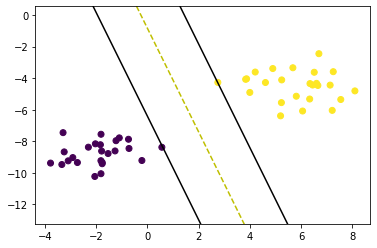

In [ ]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()